<a href="https://colab.research.google.com/github/shobith4912/shobith/blob/main/22BDS0286_BCSE331L_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCSE331L – Exploratory Data Analysis (EDA)
**Reg. No.: 22BDS0286**  
**Generated on:** 2025-08-15 17:33:41

---
### Submission Instructions
1. Open this notebook in **Google Colab**.
2. Go to **File → Save a copy in GitHub** and name it as **RollNo.ipynb** (e.g., `22BDS0286.ipynb`).
3. Ensure your GitHub account is connected to Colab when prompted.

---
### Dataset
Source (CSV): `https://raw.githubusercontent.com/salemprakash/EDA/main/Data/happiness.csv`

---
### What this notebook covers
- Loading the dataset
- Dimensions, summary statistics
- Data handling & cleaning (dtypes, missing values, duplicates, standardization of columns)
- Univariate, bivariate, and multivariate analysis (with **matplotlib** visualizations)

> **Note:** This notebook avoids seaborn and uses only matplotlib for charts, as required.


In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from urllib.request import urlopen

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

DATA_URL = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/happiness.csv'
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [2]:
# Load dataset
df = pd.read_csv(DATA_URL)
print('Loaded shape:', df.shape)
display(df.head())


Loaded shape: (17137, 34)


,rownames,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,teens,income,region,attend,happy,owngun,tvhours,vhappy,mothfath16,black,gwbush04,female,blackfemale,gwbush00,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
0,1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,0.0,$10000 - 14999,middle atlantic,sevrl times a yr,pretty happy,NaN,2.0,0,1.0,1,NaN,1,1,NaN,1.0,0.0,1,0,0,0,0,0,0,1.0
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,0.0,NaN,middle atlantic,every week,very happy,NaN,3.0,1,0.0,1,NaN,0,0,NaN,0.0,0.0,1,0,0,0,0,0,0,0.0
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,0.0,$15000 - 19999,middle atlantic,more thn once wk,pretty happy,iap,1.0,0,0.0,1,NaN,1,1,NaN,0.0,1.0,1,0,0,0,0,0,0,NaN
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,0.0,$15000 - 19999,middle atlantic,once a year,not too happy,NaN,3.0,0,0.0,0,NaN,0,0,NaN,0.0,0.0,1,0,0,0,0,0,0,1.0
4,5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,1.0,$10000 - 14999,middle atlantic,once a year,not too happy,iap,NaN,0,0.0,1,NaN,1,1,NaN,0.0,0.0,1,0,0,0,0,0,0,0.0


In [3]:
# Dimensions & Info
rows, cols = df.shape
print(f'Dimensions → rows: {rows}, cols: {cols}')
print('\nData Types:')
print(df.dtypes)
print('\nInfo:')
print(df.info())

# Summary statistics for numeric and categorical
print('\nNumeric Summary:')
display(df.describe())

print('\nCategorical Summary:')
display(df.describe(include=['object']))


Dimensions → rows: 17137, cols: 34

Data Types:
rownames         int64
year             int64
workstat        object
prestige       float64
divorce         object
widowed         object
educ           float64
reg16           object
babies         float64
preteen        float64
teens          float64
income          object
region          object
attend          object
happy           object
owngun          object
tvhours        float64
vhappy           int64
mothfath16     float64
black            int64
gwbush04       float64
female           int64
blackfemale      int64
gwbush00       float64
occattend      float64
regattend      float64
y94              int64
y96              int64
y98              int64
y00              int64
y02              int64
y04              int64
y06              int64
unem10         float64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 

,rownames,year,prestige,educ,babies,preteen,teens,tvhours,vhappy,mothfath16,black,gwbush04,female,blackfemale,gwbush00,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
count,17137.000000,17137.000000,16283.000000,17093.000000,17036.000000,17036.000000,17049.000000,11794.000000,17137.000000,17132.000000,17137.000000,1930.000000,17137.000000,17137.000000,3436.000000,16864.000000,16864.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,17137.000000,11341.000000
mean,8569.000000,1999.474120,43.877541,13.319078,0.207091,0.255753,0.181360,2.904019,0.306938,0.692972,0.138414,0.501554,0.559083,0.089047,0.521828,0.284986,0.131226,0.173718,0.168349,0.163739,0.162047,0.079886,0.078018,0.174243,0.318402
std,4947.170117,4.143358,13.873965,2.986785,0.540542,0.621533,0.493698,2.327457,0.461237,0.461274,0.345344,0.500127,0.496511,0.284820,0.499596,0.451421,0.337658,0.378878,0.374187,0.370050,0.368505,0.271124,0.268208,0.379329,0.465877
min,1.000000,1994.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4285.000000,1996.000000,33.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8569.000000,1998.000000,43.000000,13.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12853.000000,2004.000000,51.000000,16.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,17137.000000,2006.000000,86.000000,20.000000,6.000000,6.000000,7.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Categorical Summary:


,workstat,divorce,widowed,reg16,income,region,attend,happy,owngun
count,17134,9754,11096,17137,15045,17137,16864,17137,11297
unique,8,2,2,10,12,9,9,3,2
top,working fulltime,no,iap,e. nor. central,$25000 or more,south atlantic,never,pretty happy,iap
freq,9214,7421,10718,3148,9725,3340,3213,9791,7180


In [4]:
# Standardize column names (strip, lower, replace spaces with underscores)
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('/', '_')
    .str.lower()
)
display(pd.DataFrame({'column': df.columns}))

# Attempt to coerce object columns that look numeric
for c in df.select_dtypes(include=['object']).columns:
    try:
        coerced = pd.to_numeric(df[c], errors='raise')
        # If no error, adopt numeric
        df[c] = coerced
    except Exception:
        pass

print('\nDtypes after coercion:')
print(df.dtypes)


,column
0,rownames
1,year
2,workstat
3,prestige
4,divorce
5,widowed
6,educ
7,reg16
8,babies
9,preteen



Dtypes after coercion:
rownames         int64
year             int64
workstat        object
prestige       float64
divorce         object
widowed         object
educ           float64
reg16           object
babies         float64
preteen        float64
teens          float64
income          object
region          object
attend          object
happy           object
owngun          object
tvhours        float64
vhappy           int64
mothfath16     float64
black            int64
gwbush04       float64
female           int64
blackfemale      int64
gwbush00       float64
occattend      float64
regattend      float64
y94              int64
y96              int64
y98              int64
y00              int64
y02              int64
y04              int64
y06              int64
unem10         float64
dtype: object


,missing_count,missing_%
gwbush04,15207,88.74
gwbush00,13701,79.95
divorce,7383,43.08
widowed,6041,35.25
owngun,5840,34.08
unem10,5796,33.82
tvhours,5343,31.18
income,2092,12.21
prestige,854,4.98
occattend,273,1.59


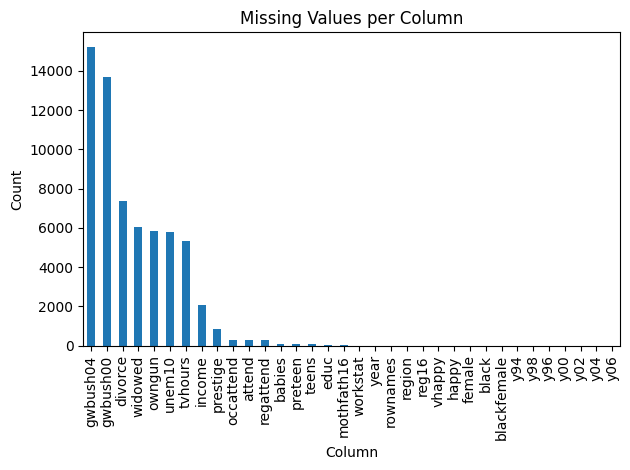

Duplicate rows: 0


In [5]:
# Missing values profile
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts / len(df) * 100).round(2)
na_table = pd.DataFrame({'missing_count': na_counts, 'missing_%': na_pct})
display(na_table)

# Plot missing values (single chart)
plt.figure()
na_counts.plot(kind='bar')
plt.title('Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Duplicates
dup_count = df.duplicated().sum()
print(f'Duplicate rows: {dup_count}')

# Optional: Drop duplicates (uncomment if required)
# df = df.drop_duplicates().reset_index(drop=True)
# print('Shape after dropping duplicates:', df.shape)


In [6]:
# Example cleaning strategies (adjust as needed for your dataset)

# Strategy A: Impute numeric missing with median
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in numeric_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

# Strategy B: Impute categorical missing with mode
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for c in categorical_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode().iloc[0])

print('Post-imputation missing values:')
print(df.isna().sum().sum())

# Save a cleaned copy
clean_path = 'cleaned_happiness.csv'
df.to_csv(clean_path, index=False)
print('Saved cleaned dataset to', clean_path)


Post-imputation missing values:
0
Saved cleaned dataset to cleaned_happiness.csv


## Univariate Analysis
This section auto-draws histograms and boxplots for numeric variables and bar charts for low-cardinality categoricals.

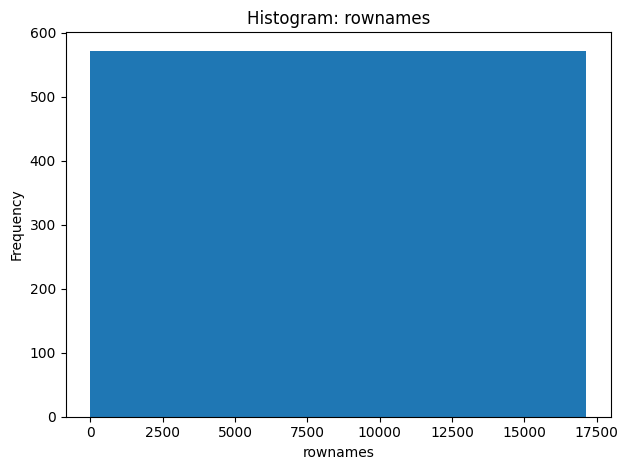

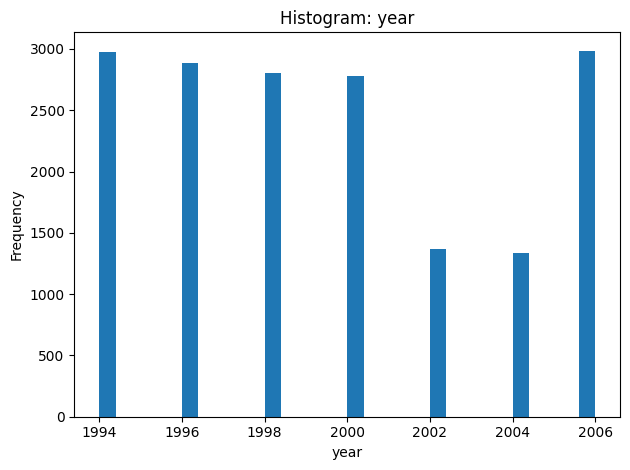

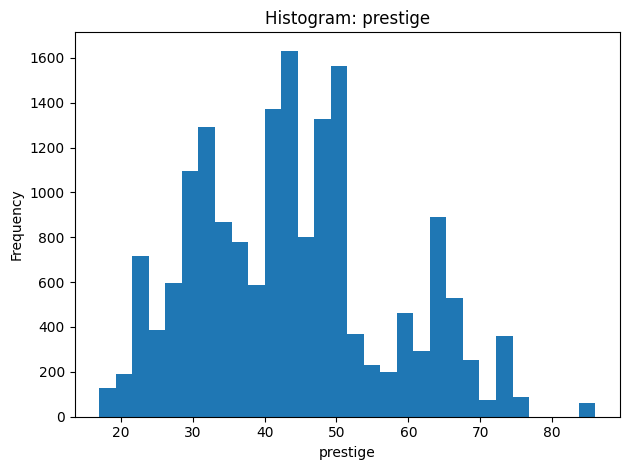

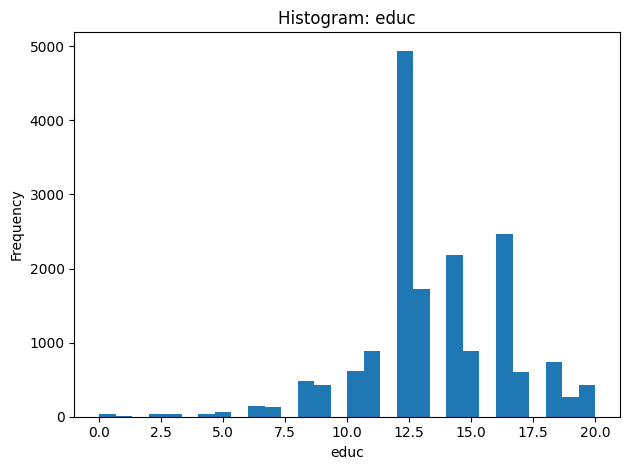

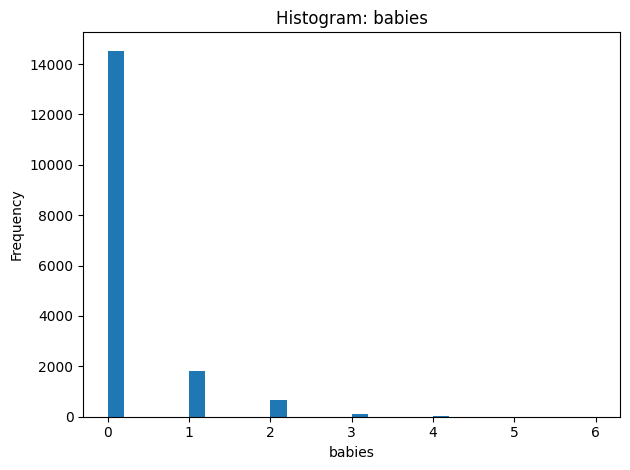

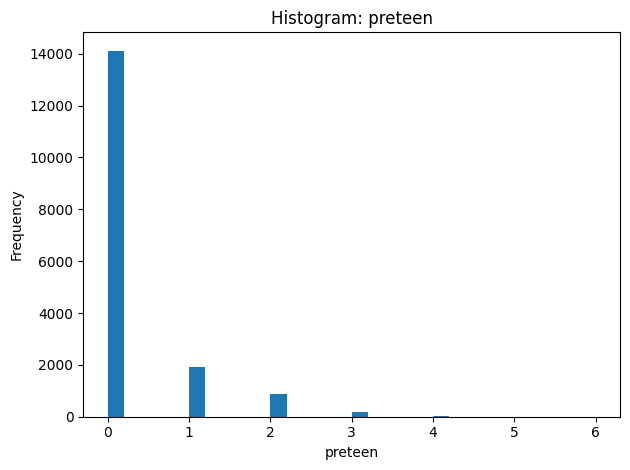

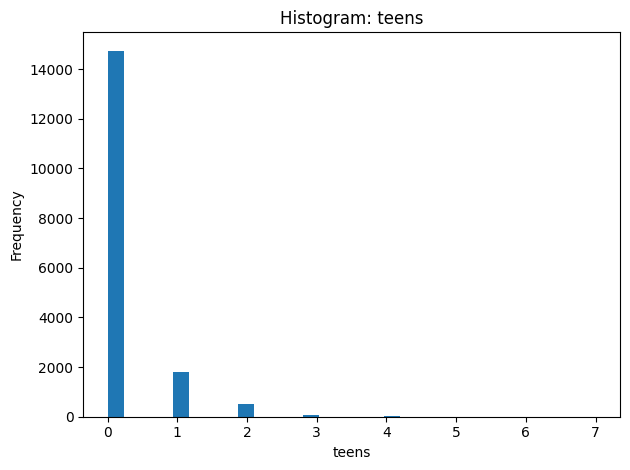

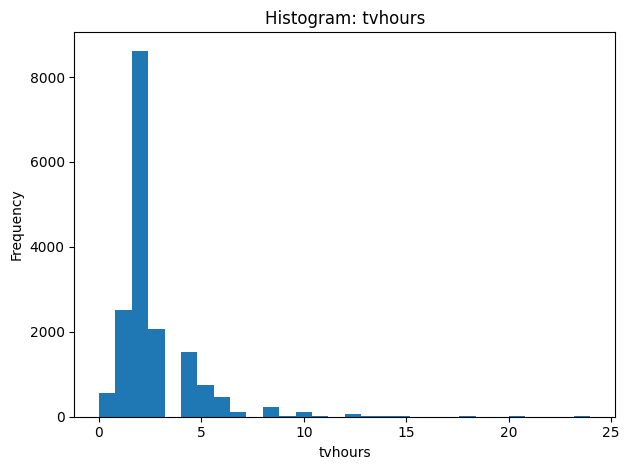

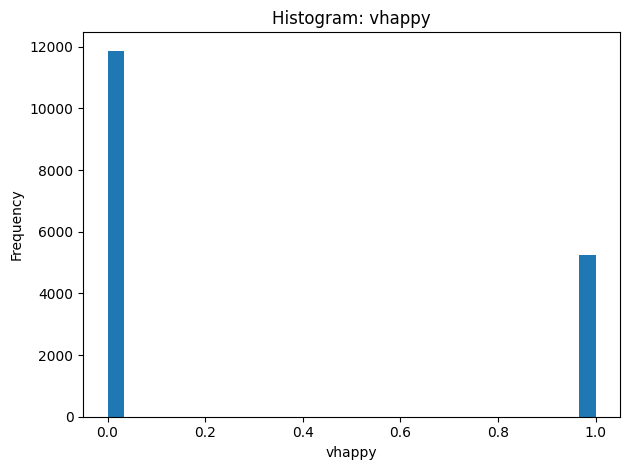

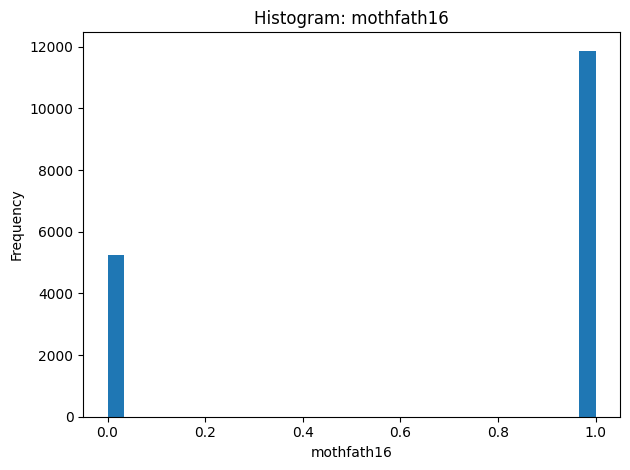

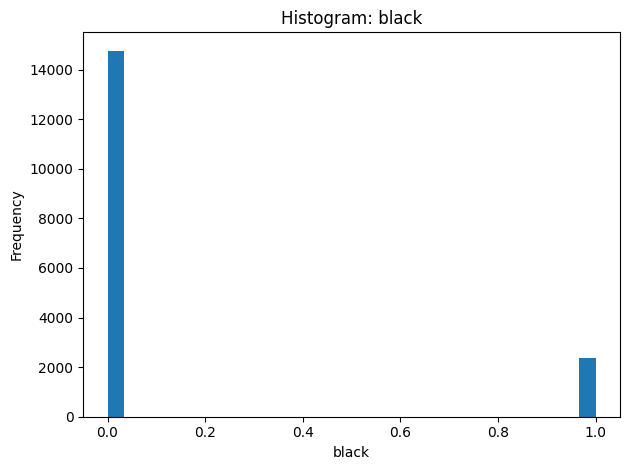

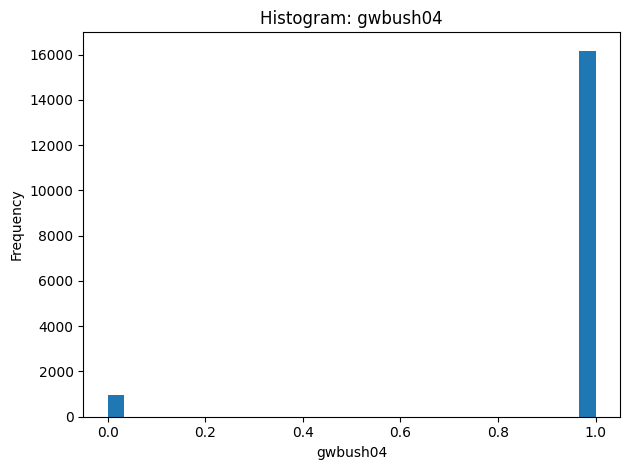

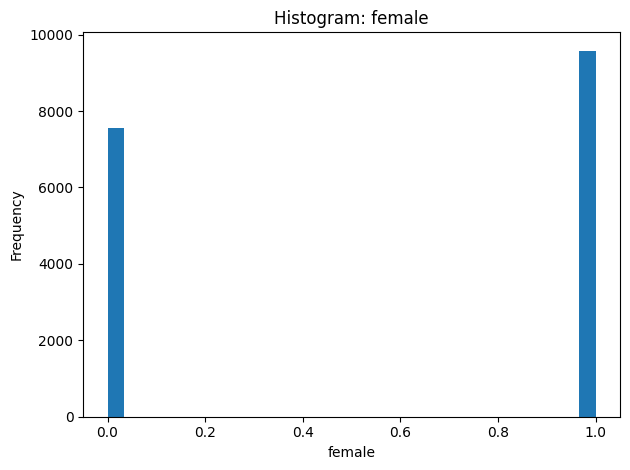

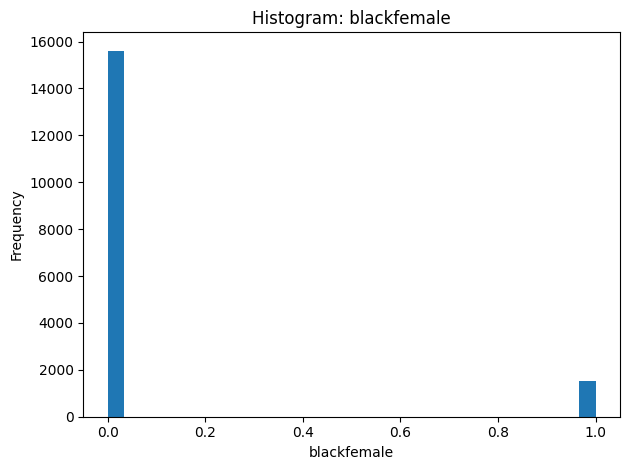

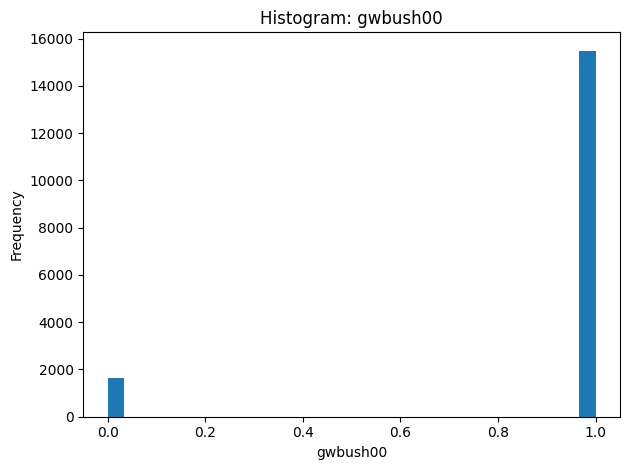

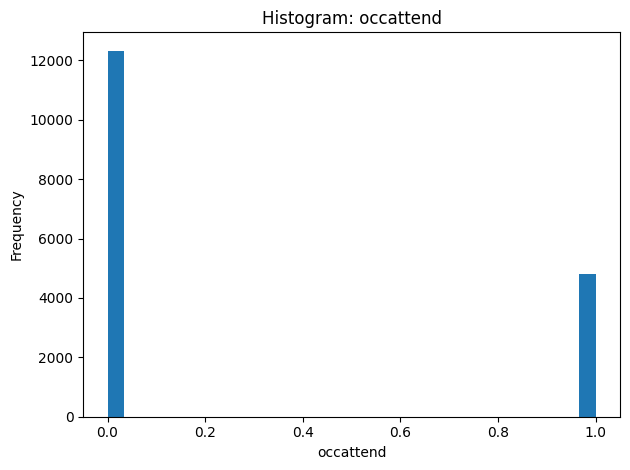

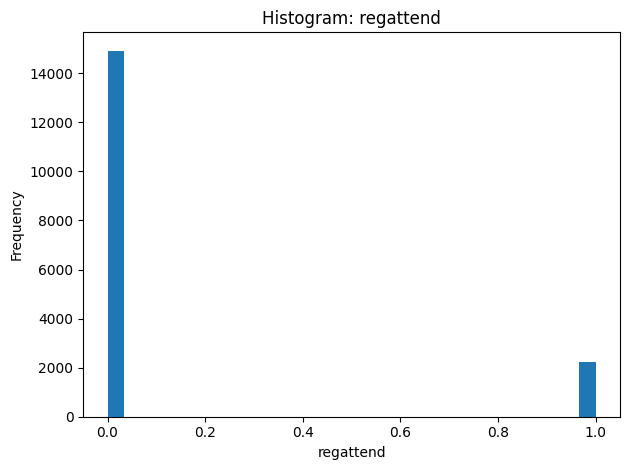

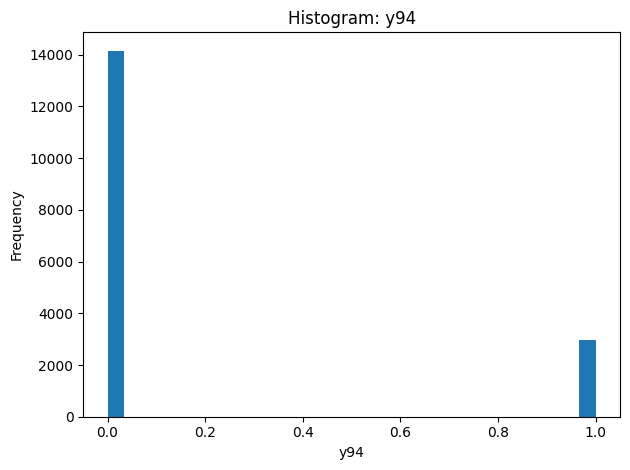

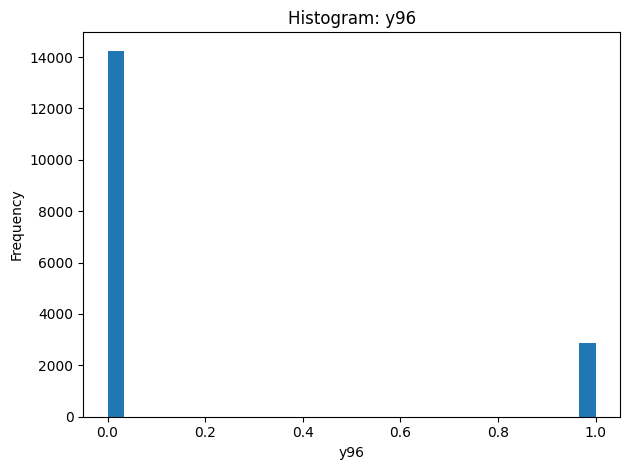

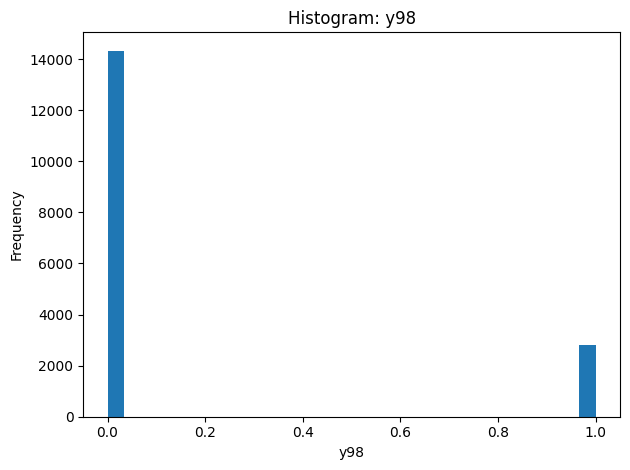

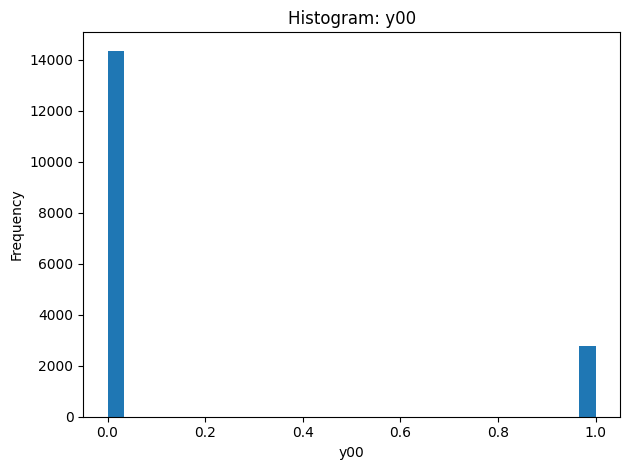

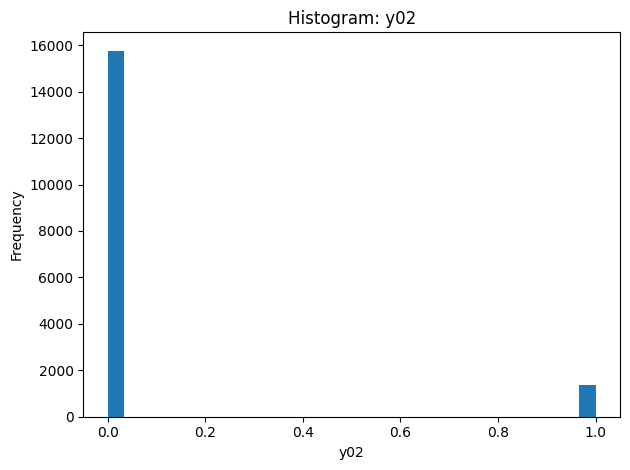

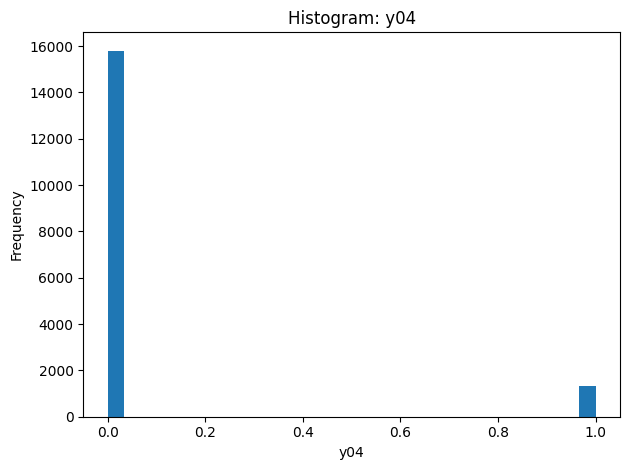

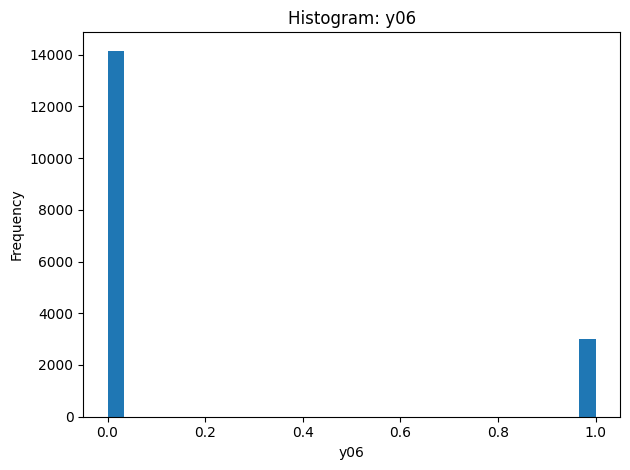

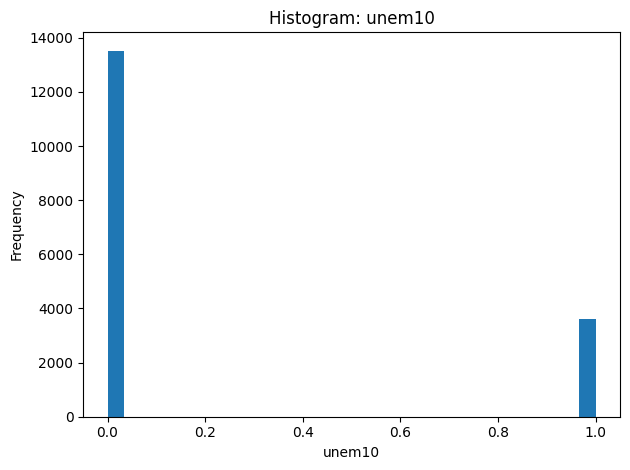

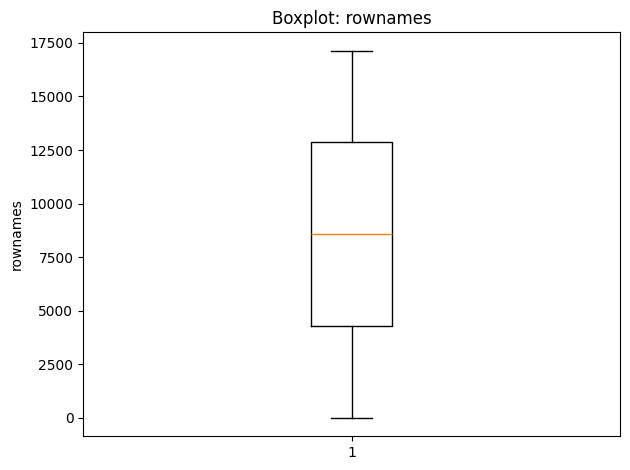

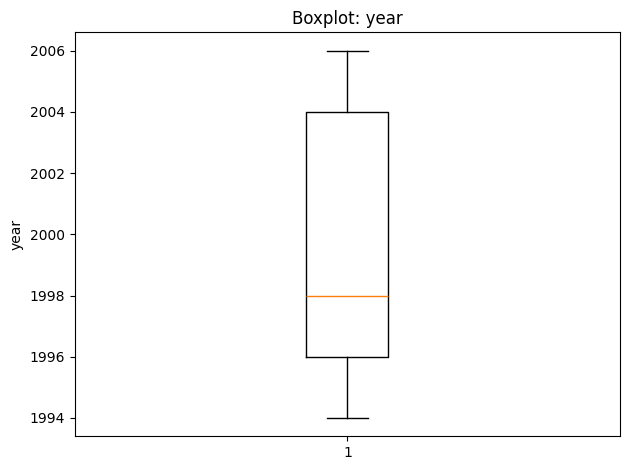

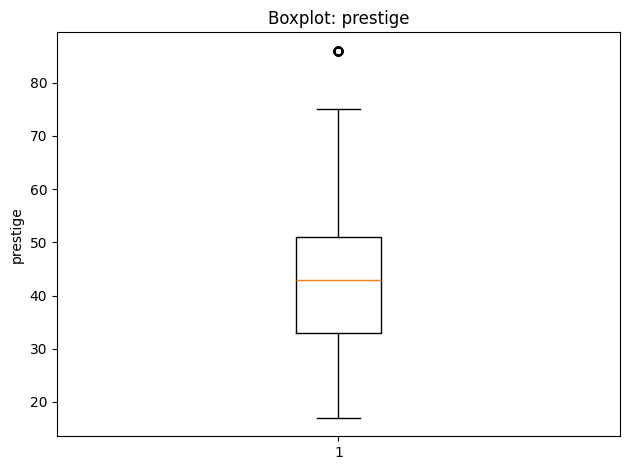

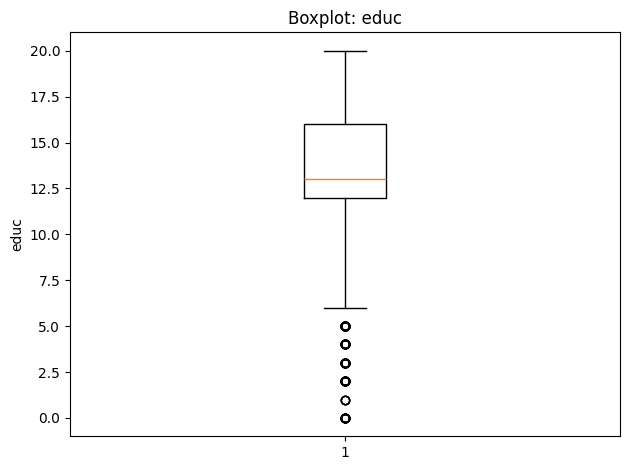

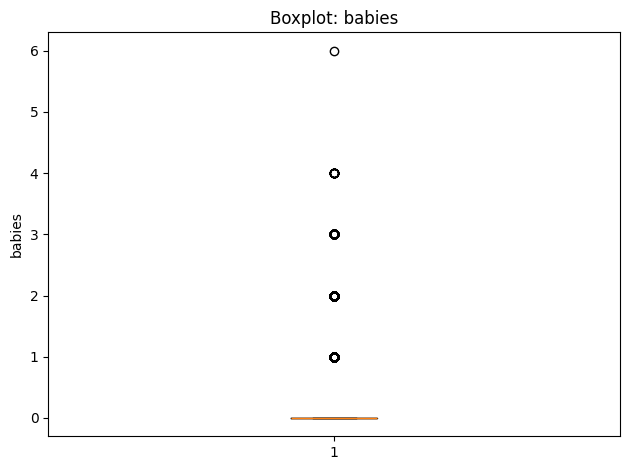

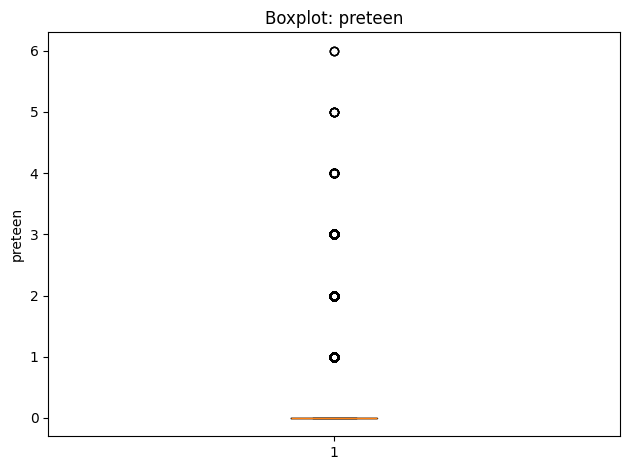

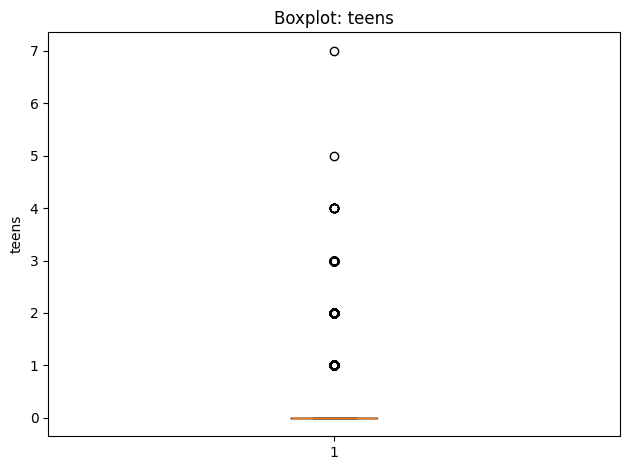

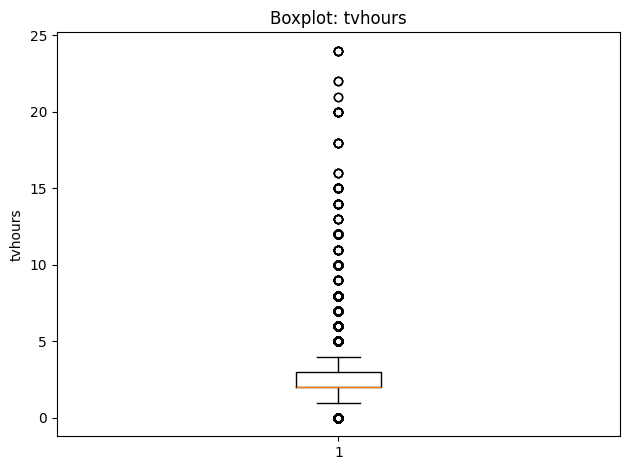

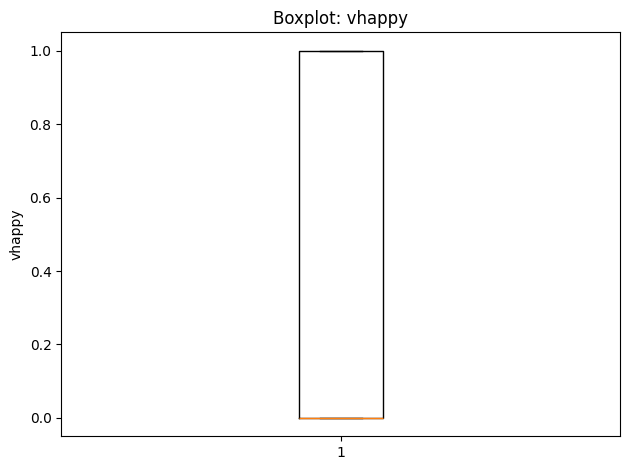

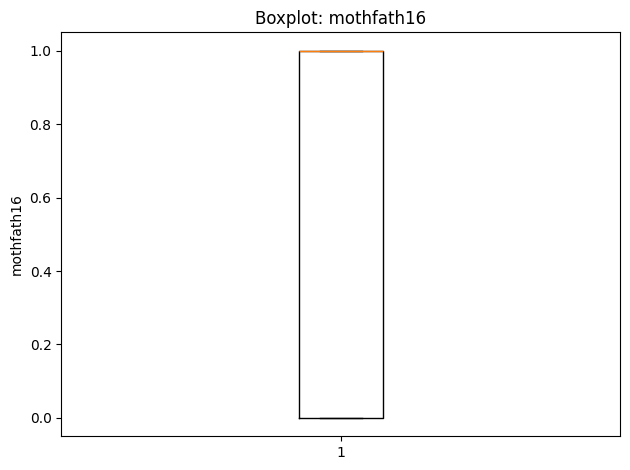

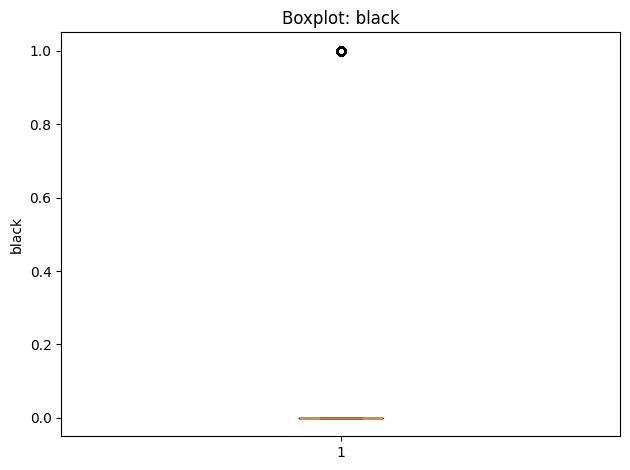

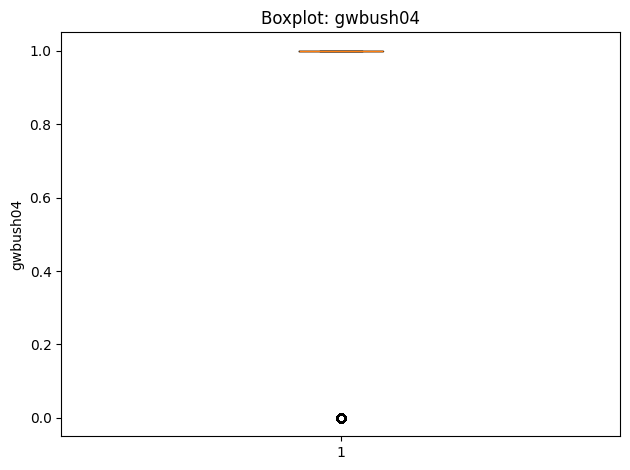

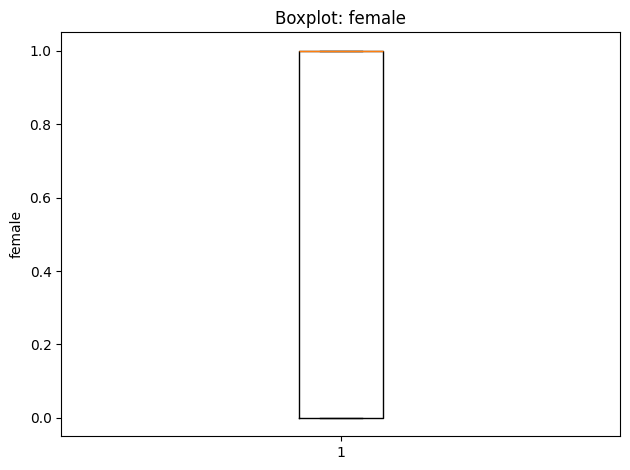

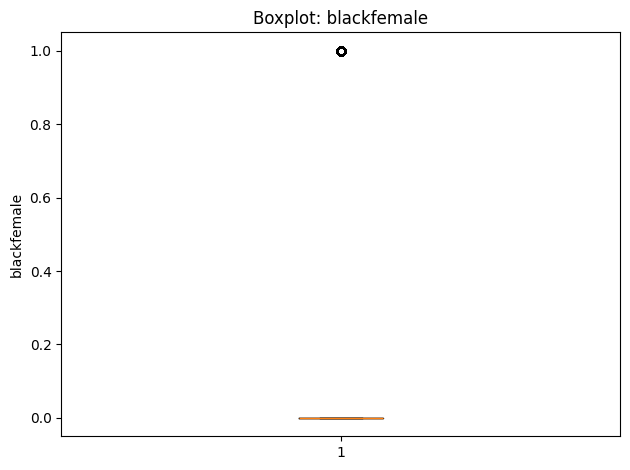

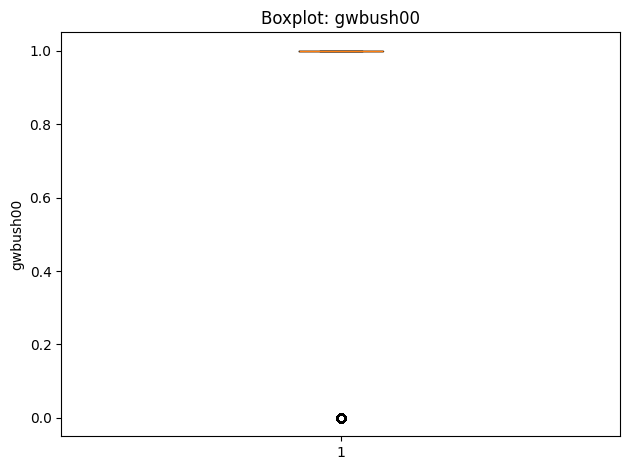

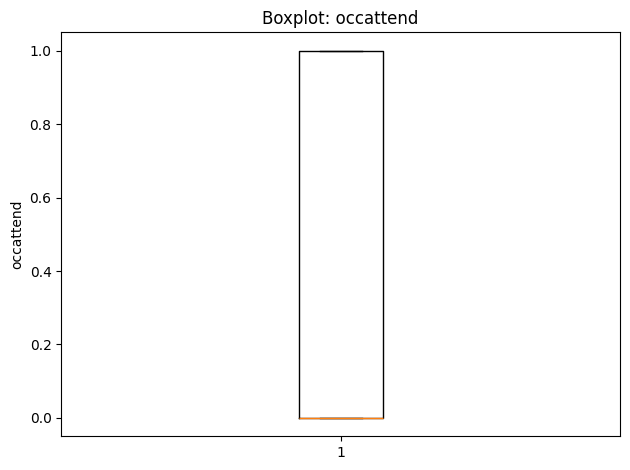

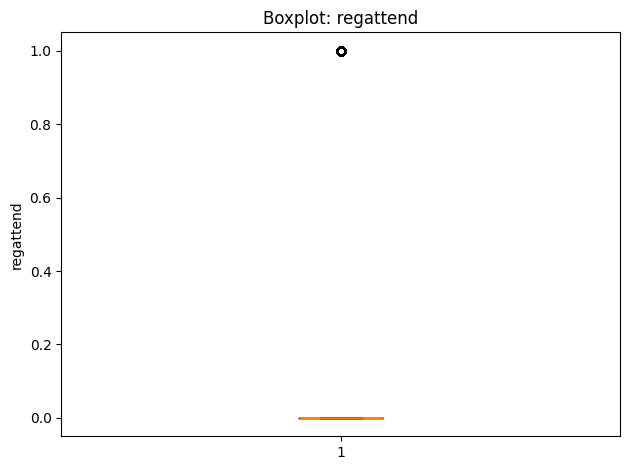

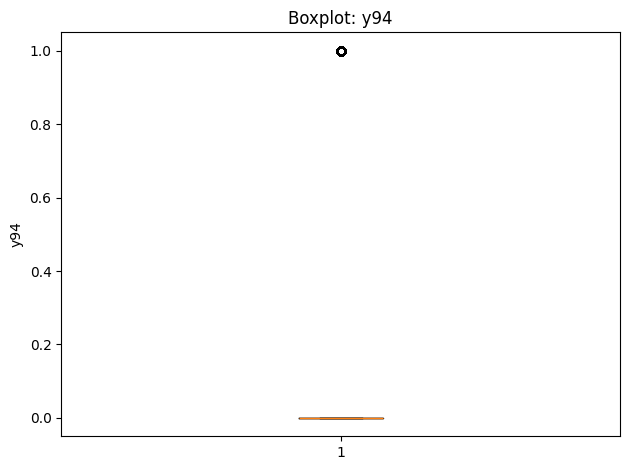

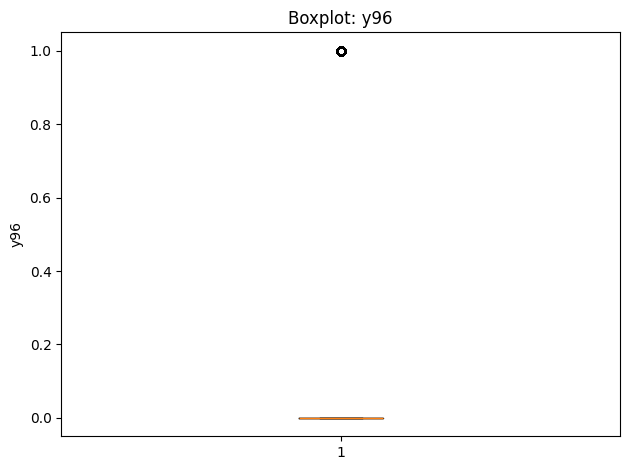

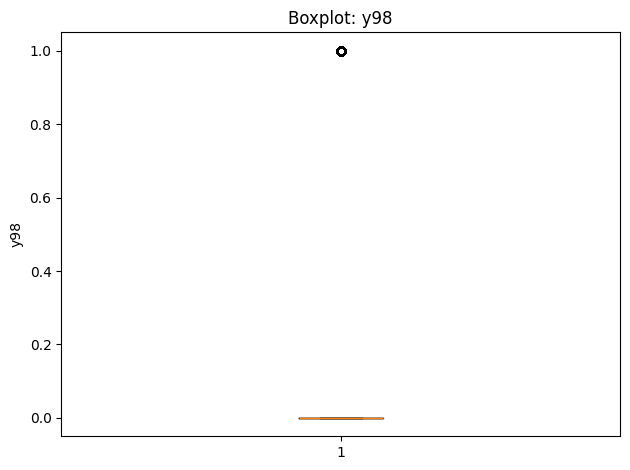

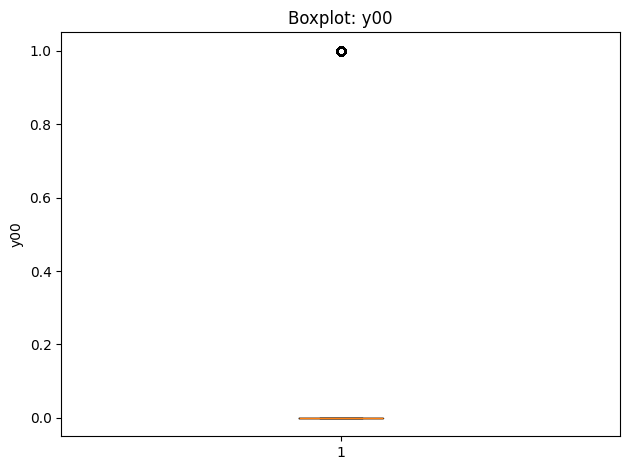

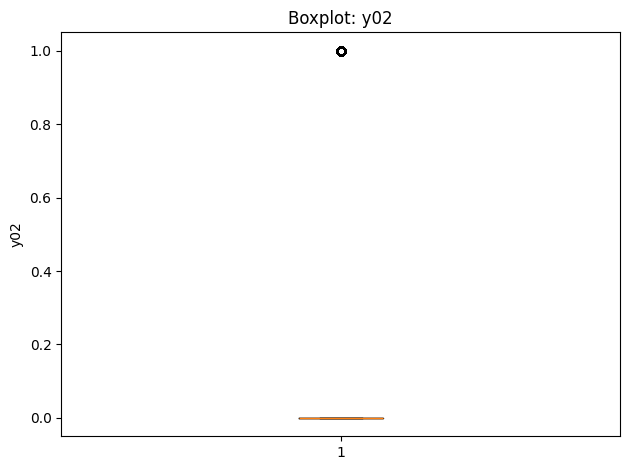

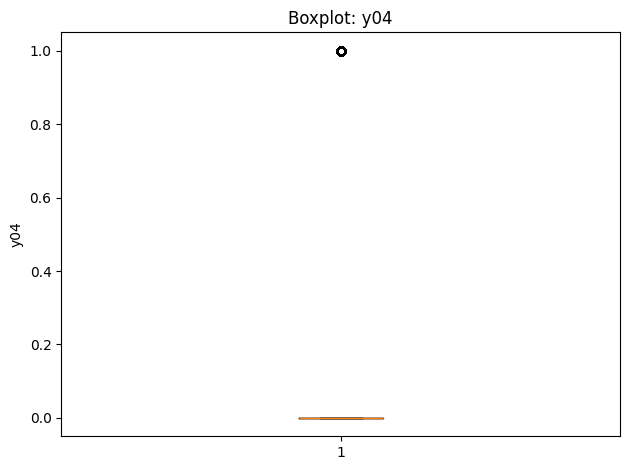

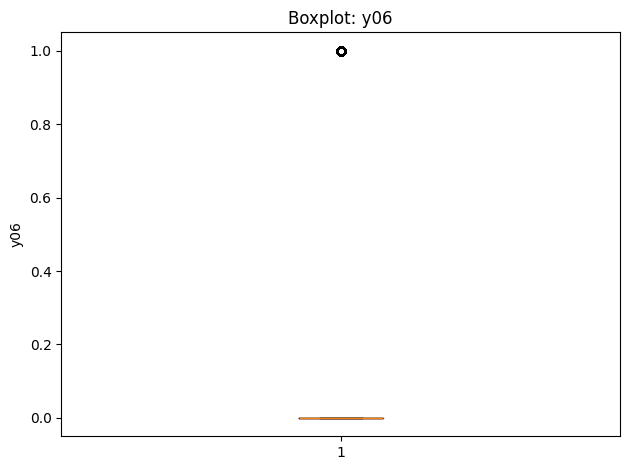

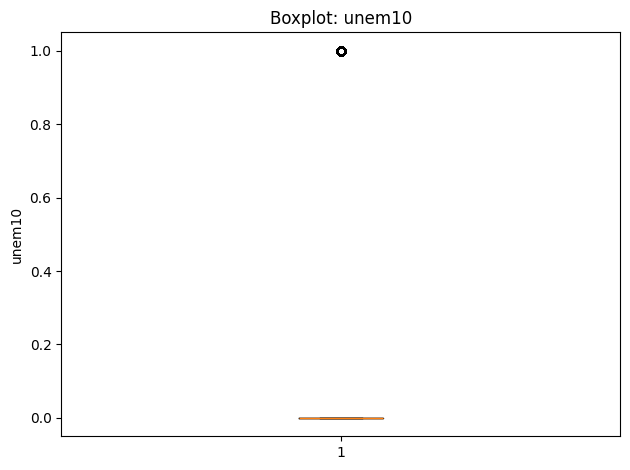

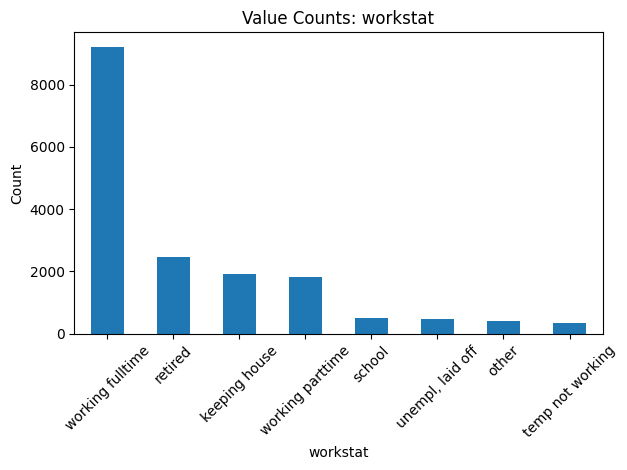

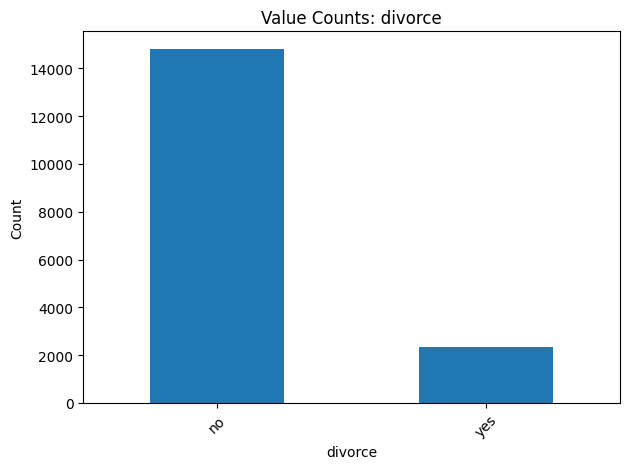

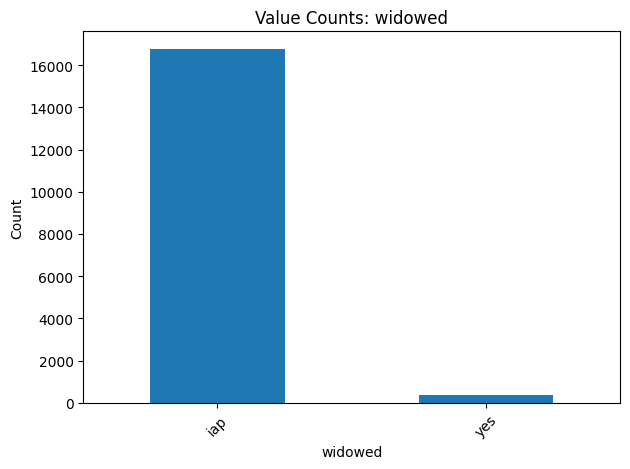

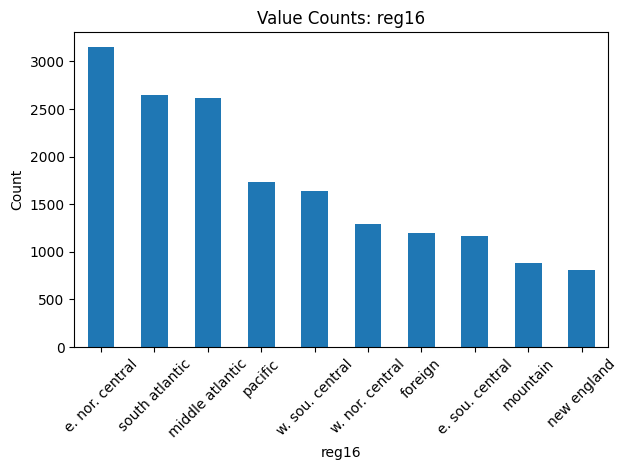

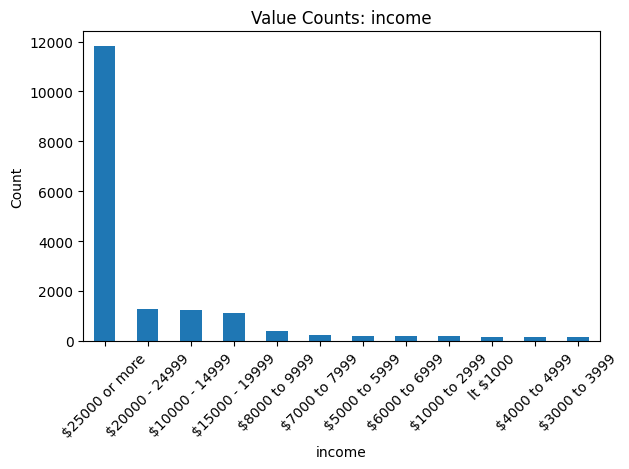

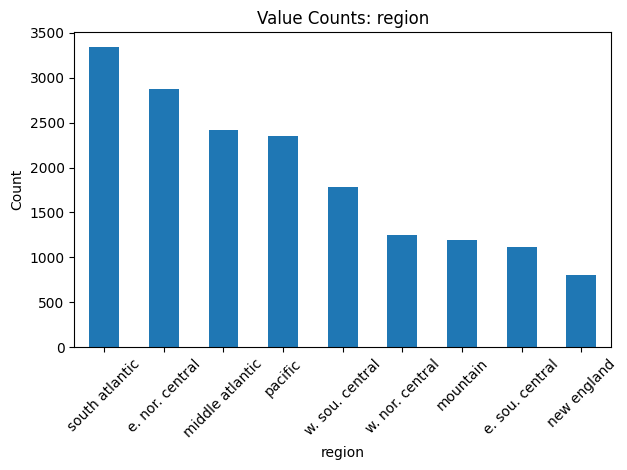

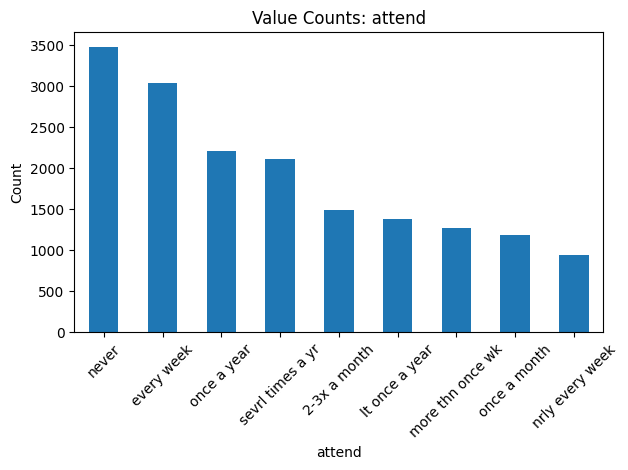

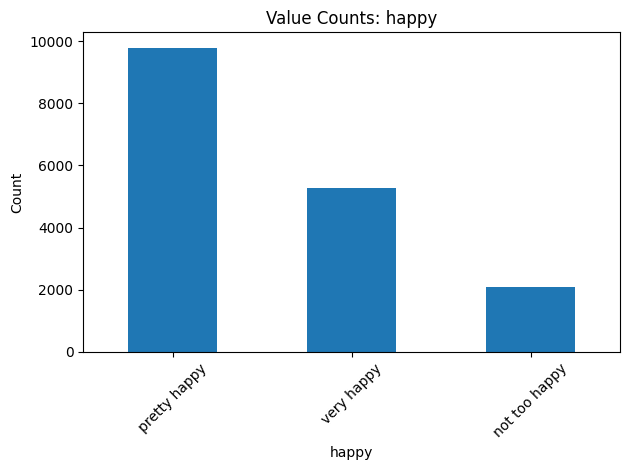

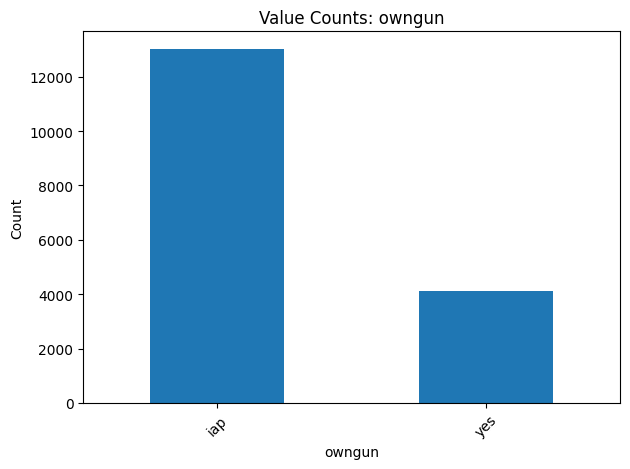

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Histograms for numeric columns (one chart per feature)
for c in numeric_cols:
    plt.figure()
    df[c].plot(kind='hist', bins=30)
    plt.title(f'Histogram: {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplots for numeric columns (one chart per feature)
for c in numeric_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f'Boxplot: {c}')
    plt.ylabel(c)
    plt.tight_layout()
    plt.show()

# Bar charts for low-cardinality categorical columns (<= 20 unique)
for c in categorical_cols:
    if df[c].nunique() <= 20:
        vc = df[c].value_counts()
        plt.figure()
        vc.plot(kind='bar')
        plt.title(f'Value Counts: {c}')
        plt.xlabel(c)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


## Bivariate Analysis
- Correlation matrix (numeric features)
- Top correlated pairs (scatter plots)
- Numeric vs Categorical (boxplots by category)


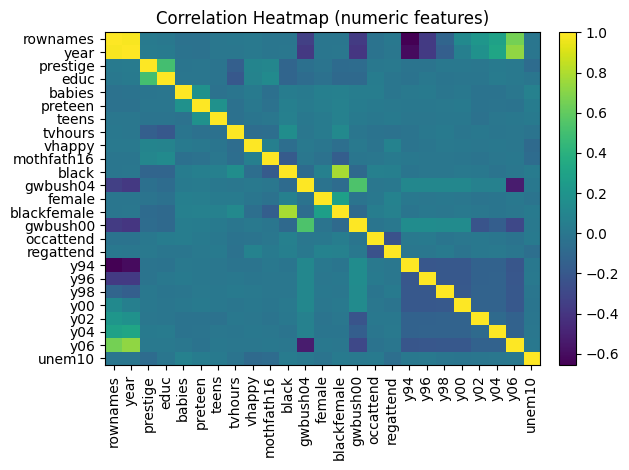

Top correlated pairs: [('rownames', 'year', np.float64(0.9806420557326596)), ('black', 'blackfemale', np.float64(0.780047929175106)), ('year', 'y06', np.float64(0.7235201898661421)), ('rownames', 'y06', np.float64(0.6569983797736648)), ('rownames', 'y94', np.float64(0.6562160908529626))]


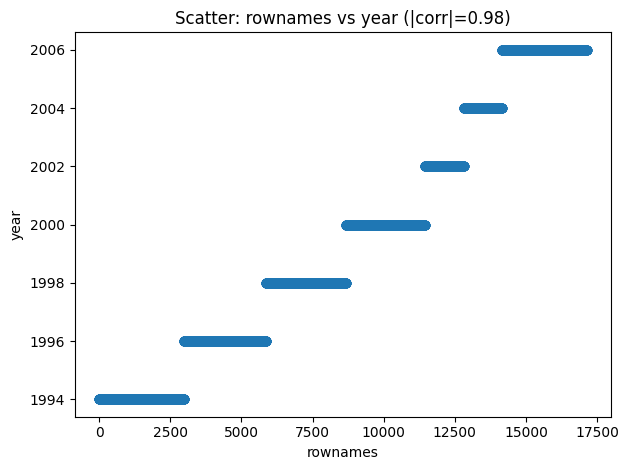

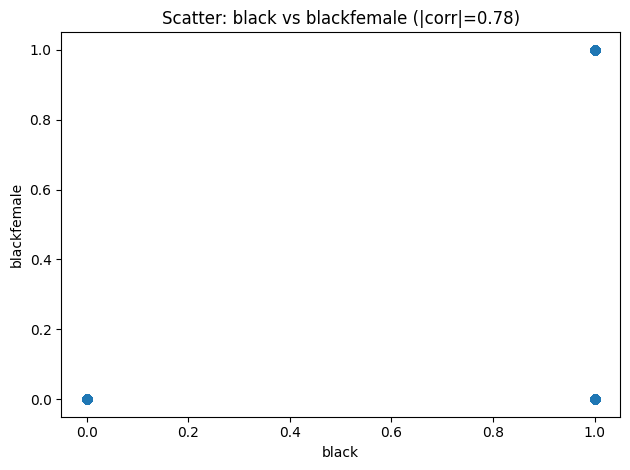

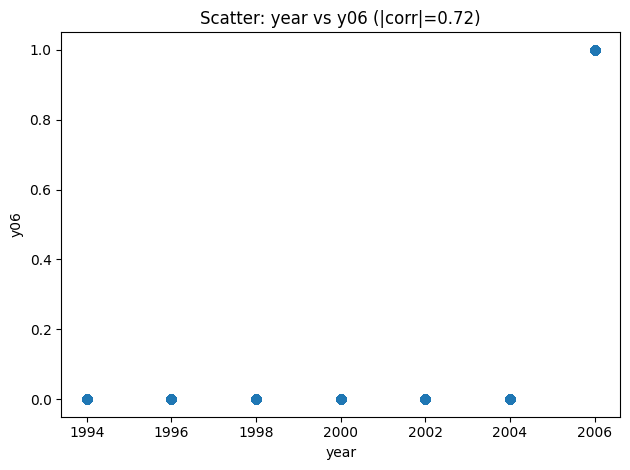

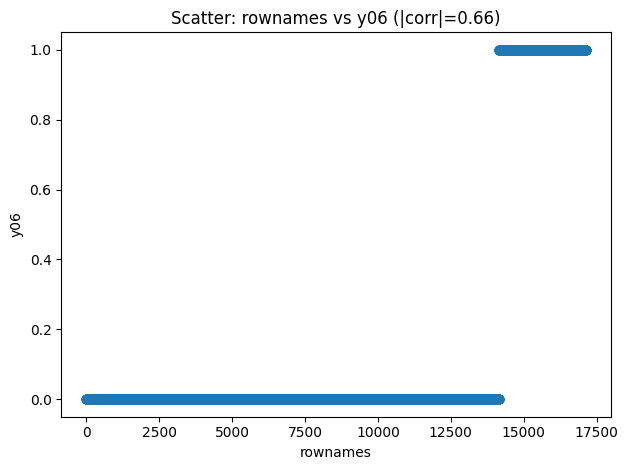

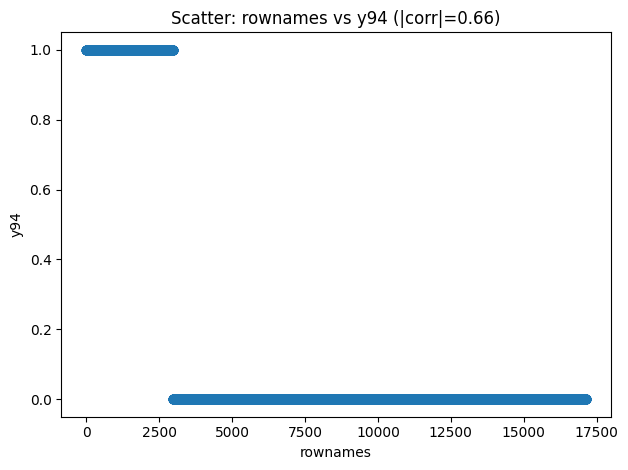

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


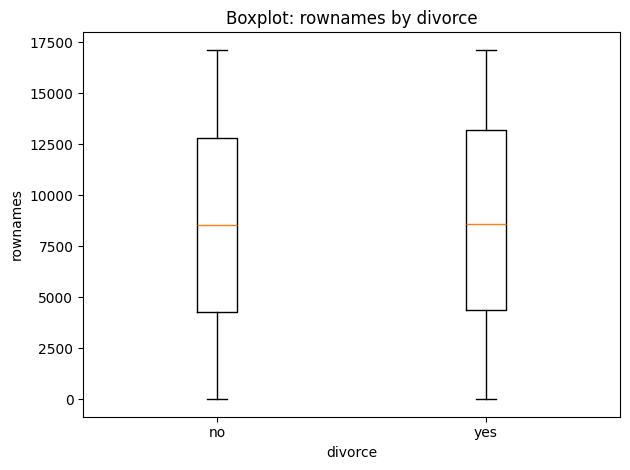

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


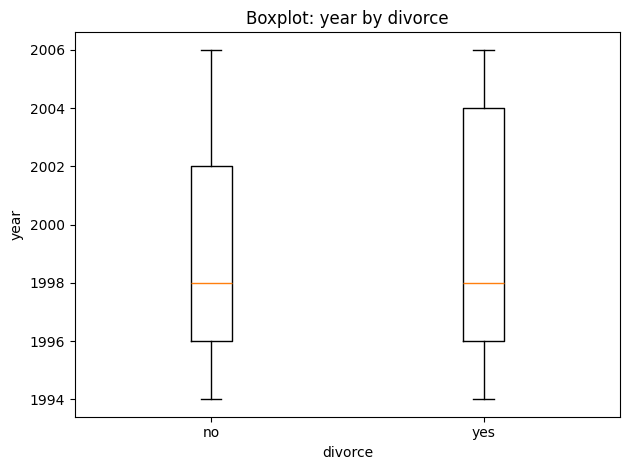

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


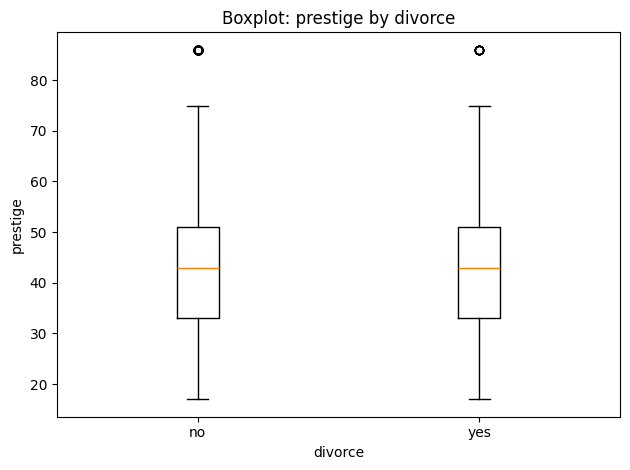

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


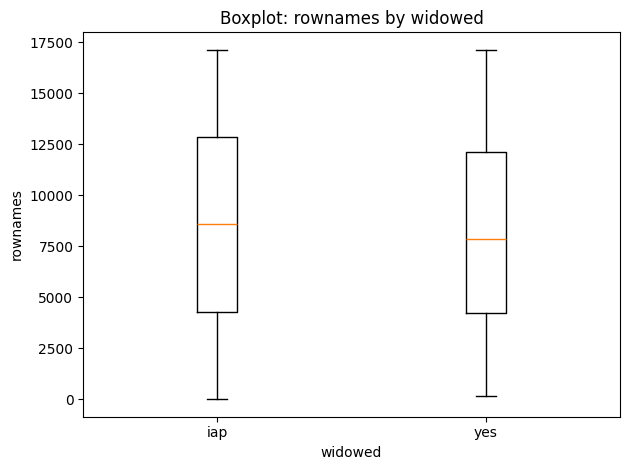

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


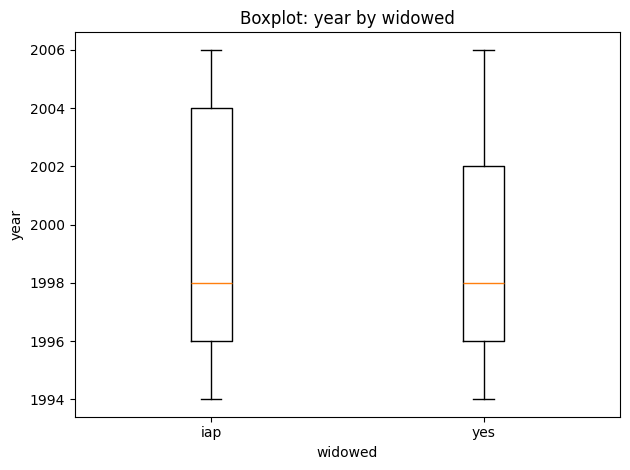

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


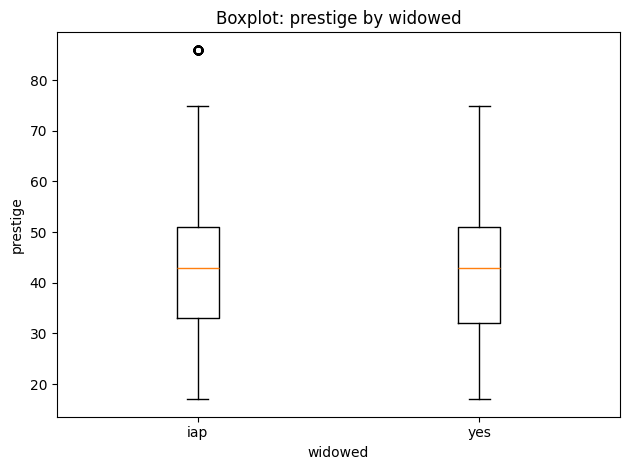

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


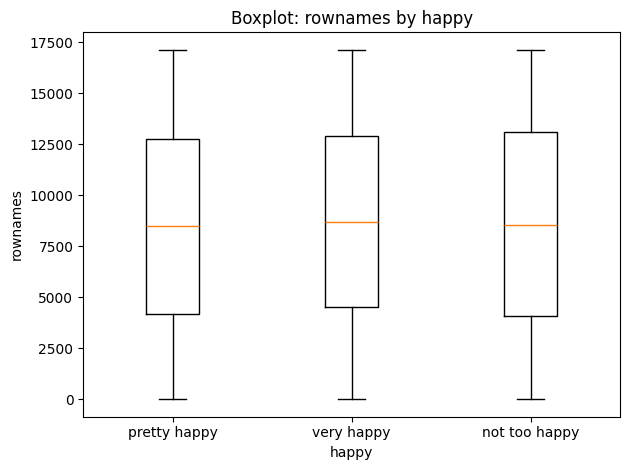

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


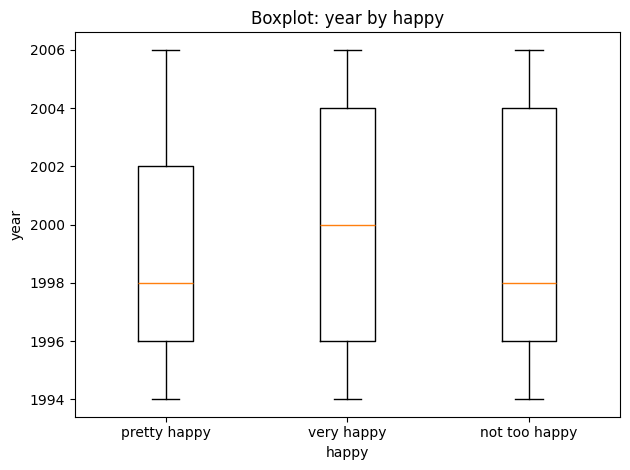

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


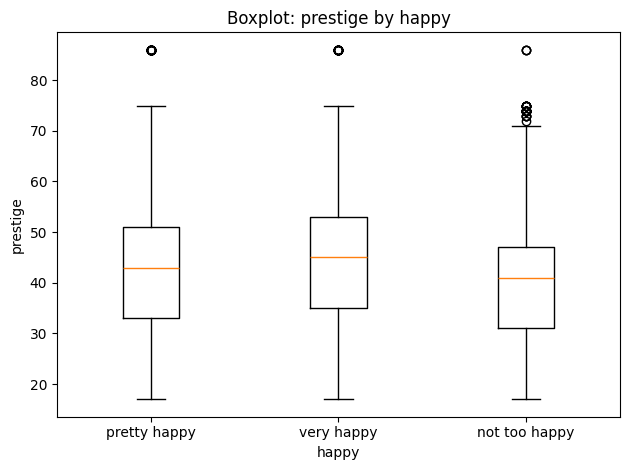

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


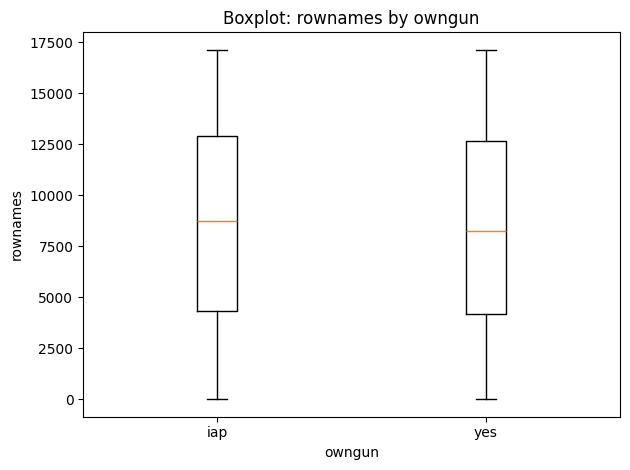

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


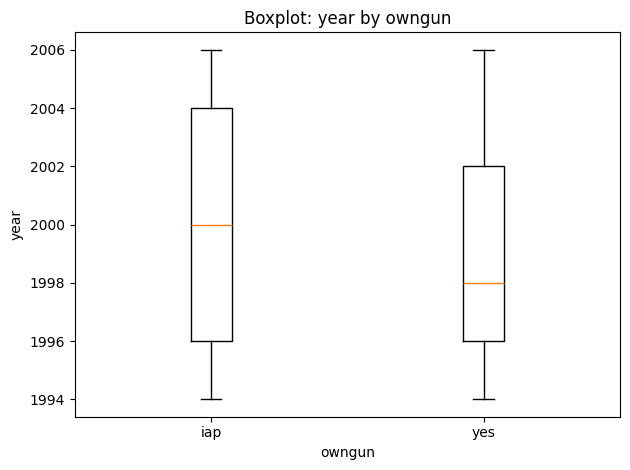

/tmp/ipython-input-1732723615.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=list(df[cat].dropna().unique()))


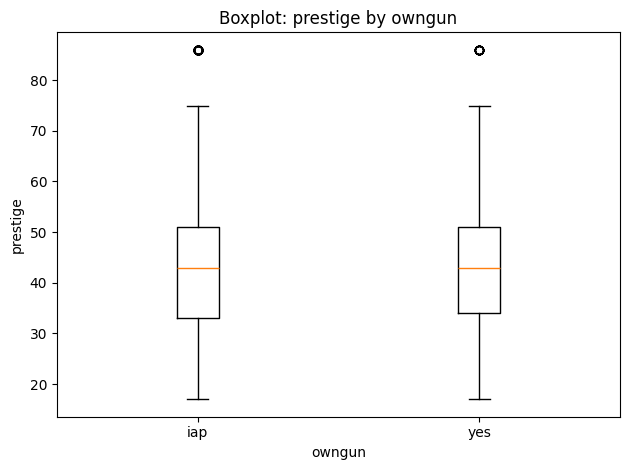

In [8]:
# Correlation matrix
corr = df[numeric_cols].corr()
plt.figure()
im = plt.imshow(corr, aspect='auto')
plt.title('Correlation Heatmap (numeric features)')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

# Top correlated pairs by absolute correlation (excluding self-correlation)
pairs = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        pairs.append((numeric_cols[i], numeric_cols[j], abs(corr.iloc[i, j])))
pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)[:5]
print('Top correlated pairs:', pairs_sorted)

# Scatter plots for top correlated pairs
for a, b, v in pairs_sorted:
    plt.figure()
    plt.scatter(df[a], df[b])
    plt.title(f'Scatter: {a} vs {b} (|corr|={v:.2f})')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.tight_layout()
    plt.show()

# Numeric vs Categorical: for categoricals with <= 5 unique values, make boxplots on top 3 numeric columns
small_cats = [c for c in categorical_cols if df[c].nunique() <= 5]
top_numeric = numeric_cols[:3] if len(numeric_cols) >= 3 else numeric_cols
for cat in small_cats:
    for num in top_numeric:
        groups = [df[df[cat] == k][num].dropna().values for k in df[cat].dropna().unique()]
        if len(groups) >= 2:
            plt.figure()
            plt.boxplot(groups, labels=list(df[cat].dropna().unique()))
            plt.title(f'Boxplot: {num} by {cat}')
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.tight_layout()
            plt.show()


## Multivariate Analysis
- Simple 3D scatter (first three numeric features)
- Optional: PCA (2 components) for visualization


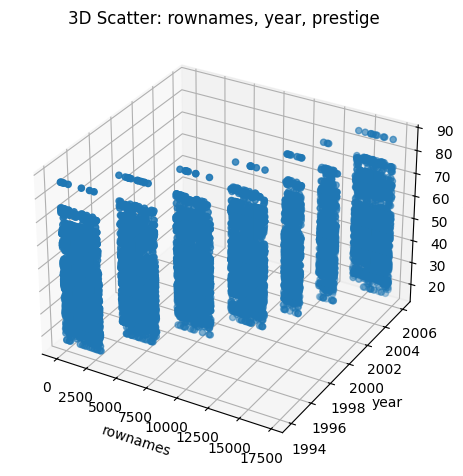

"\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler\n\nnum_df = df[numeric_cols].dropna()\nX = StandardScaler().fit_transform(num_df)\npca = PCA(n_components=2, random_state=RANDOM_STATE)\nX_pca = pca.fit_transform(X)\n\nplt.figure()\nplt.scatter(X_pca[:,0], X_pca[:,1])\nplt.title('PCA (2 Components)')\nplt.xlabel('PC1')\nplt.ylabel('PC2')\nplt.tight_layout()\nplt.show()\n"

In [9]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D plotting)

if len(numeric_cols) >= 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[numeric_cols[0]], df[numeric_cols[1]], df[numeric_cols[2]])
    ax.set_title(f'3D Scatter: {numeric_cols[0]}, {numeric_cols[1]}, {numeric_cols[2]}')
    ax.set_xlabel(numeric_cols[0])
    ax.set_ylabel(numeric_cols[1])
    ax.set_zlabel(numeric_cols[2])
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for 3D scatter.')

# Optional PCA (uncomment to run)
'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_df = df[numeric_cols].dropna()
X = StandardScaler().fit_transform(num_df)
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title('PCA (2 Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()
'''


## Insights & Observations (Fill-in)
- Key distributions and central tendencies:
- Outliers and potential reasons:
- Strong correlations and possible causal hypotheses:
- Categorical trends:
- Data quality issues and how they were addressed:

## References (if any)
- Add reliable web sources you used to understand attributes (e.g., World Happiness Report, dataset documentation, etc.)


---
### Final Step
- In **Colab**, go to **File → Save a copy in GitHub**.
- Repository: choose yours
- File name: `22BDS0286.ipynb`
- Commit message: `BCSE331L EDA submission`
